## Wine Dataset

El wine dataset consta de 13 parámetros diferentes del vino, como el contenido de alcohol, medidos en 178 muestras de vino. Estos vinos se cultivaron en la misma región de Italia pero se derivaron de tres cultivares diferentes; por lo tanto, hay tres clases diferentes de vino.

El objetivo es encontrar un modelo que pueda predecir la clase del vino dados los 13 parámetros observados y crear varios modelos de clasificación (Regresión Logistica y K-NN) y evaluar la precisión de cada uno de ellos.

Los features del dataset son:

    1) Alcohol
    2) Malic acid
    3) Ash
    4) Alcalinity of ash
    5) Magnesium
    6) Total phenols
    7) Flavanoids
    8) Nonflavanoid phenols
    9) Proanthocyanins
    10) Color intensity
    11) Hue
    12) OD280/OD315 of diluted wines
    13) Proline       
    
El label esta representado por los valores 1, 2 y 3 para identificar cada tipo de vino.


### Ejercicio 1
a) Escribir en Python un programa para dividir el dataset del archivo wine.csv almacenando los features en una variable llamada **X**  y los labels en una variable llamada **y**.

b) Imprimir los 5 primeros ejemplos (filas) de X

c) Imprimir la cantidad de ejemplos por cada clase

**Ayuda:**
- pandas.read_csv(file) crea un DataFrame a partir de un archivo .csv
- Dataframe.iloc[] permite filtrar columnas
- DataFrame.head() permite imprimir las primeras filas del DataFrame
- Series.value_counts() cuenta la cantidad de ocurrencias por cada valor en la serie (columna)

In [1]:
# Escribir en Python un programa para dividir el dataset del archivo wine.csv almacenando los features en una variable llamada **X**  y los labels en una variable llamada **y**.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('wine.csv')

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [2]:
# b. Imprimir los 5 primeros ejemplos (filas) de X
X[:5]

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# c. Imprimir la cantidad de ejemplos por clase
y.value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

### Ejercicio 2
a) Utilizar la librería Scikit-learn para dividir el dataset de vinos en un 70 % de datos de entrenamiento y un 30 % de datos de testeo. Del total de 178 registros, el conjunto de entrenamiento contendrá 124 registros y el conjunto de prueba contiene 54 de esos registros. Las variables X_train, y_train deberan contener los features y los labels del dataset de entrenamiento y X_test, y_test deberan contener los features y los labels del dataset de testeo.

b) Imprima el tamaño de cada dataset resultante (**X** e **y** para entrenamiento y para testeo).

**Ayuda:**
- Se puede utilizar el método train_test_split de Scikit-Learn 
- DataFrame.shape permite conocer el tamaño del Dataframe (Filas, Columnas)


In [4]:
# a. Utilizar la librería Scikit-learn para dividir el dataset de vinos en un 70 % de datos de entrenamiento y un 30 % de datos de testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
# b. Imprima el tamaño de cada dataset resultante (X e y para entrenamiento y para testeo)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (124, 13)
y_train: (124,)
X_test: (54, 13)
y_test: (54,)


### Ejercicio 3
Escriba un programa Python para ver algunos detalles estadísticos básicos como cantidades, percentiles, media, desviación estándar, etc. de los tipos de vino (1, 2 y 3) solamente de los siguientes features: 'Alcohol', 'Phenols', 'Color.int'

**Ayuda:**
- En Pandas se utilizan filtros para seleccionar ejemplos especificos. Por ejemplo, para obtener todas los ejemplos (filas) correspondientes al vino "Tipo 1" se puede hacer **X[y == 1]**, esto crea un DataFrame nuevo con los ejemplos de **X** que en el DataFrame y tengan el label 1.
- Si ademas se quieren filtrar columnas se pueden listar por su nombre. Por ejemplo **X[['Alcohol', 'Phenols']]** devuelve un DataFrame solo con las columnas 'Alcohol' y 'Phenols'.
- DataFrame.describe() se utiliza para obtener estadisticas de un DataFrame como media, std, etc.

In [6]:
# Escriba un programa Python para ver algunos detalles estadísticos básicos como cantidades, percentiles, media, desviación estándar, etc. de los tipos de vino (1, 2 y 3) solamente de los siguientes features: ‘Alcohol’, ‘Phenols’, ‘Color.int’

X_train[y_train == 1][['Alcohol', 'Phenols', 'Color.int']].describe()
X_train[y_train == 2][['Alcohol', 'Phenols', 'Color.int']].describe()
X_train[y_train == 3][['Alcohol', 'Phenols', 'Color.int']].describe()

,Alcohol,Phenols,Color.int
count,31.000000,31.000000,31.000000
mean,13.109032,1.686452,7.710323
std,0.528276,0.329065,2.365845
min,12.200000,1.250000,4.000000
25%,12.735000,1.480000,5.590000
50%,13.160000,1.650000,7.650000
75%,13.465000,1.795000,9.490000
max,14.340000,2.800000,13.000000


### Ejercicio 4
Escriba un programa en Python para crear un diagrama de dispersión de forma que en el eje x se encuentre el feature "Alcohol", en el eje y el feature "Color.int" y que los puntos de dispersión presenten colores diferentes que distingan las tres clases de vinos.

**Ayuda:**
- En matplotlib se puede utilizar el método .scatter para crear un grafico de dispersión. Los valores del eje x y del eje y se pasan por parametro, como así también este método acepta un parametro, llamado **c**, el cual puede ser un arreglo numerico que define los colores de los puntos de dispersión (la variable y, anteriormente creada, es un arreglo de numeros -1, 2 y 3- que puede utilizarse para definir el parametro **c**)



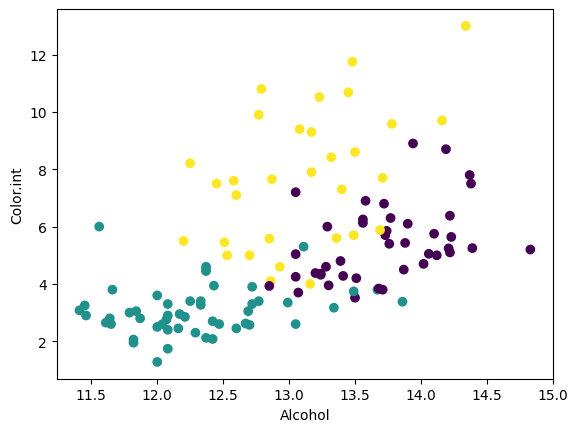

In [7]:
# Escriba un programa en Python para crear un diagrama de dispersión de forma que en el eje x se encuentre el feature "Alcohol", en el eje y el feature "Color.int" y que los puntos de dispersión presenten colores diferentes que distingan las tres clases de vinos.

plt.scatter(X_train["Alcohol"], X_train["Color.int"], c=y_train)
plt.xlabel("Alcohol")
plt.ylabel("Color.int")
plt.show()

## Regresión Logística
A continuación, vamos a entrenar un modelo de Regresión Logística considerando unicamente los features "Alcohol" y "Color.int" para poder observar gráficamente el limite de decisión creado automaticamente por el modelo entrenado con Scikit-Learn.

**Atención!** Para que estas lineas de codigo puedan ejecutarse es necesario contar con las variables X_train, y_train, X_test e y_train correctamente seteadas en el ejercicio previo.

In [8]:
# Importamos el modulo DecisionBoundaryDisplay que nos serviá para visualizar el limite de decisión en el grafico de dispersión
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression 

#Creamos un método que grafique el limite de decisión en el grafico de dispersión
def plot_model(X_plot, y, model, ax):  
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    
    disp.ax_.scatter(X_plot["Alcohol"], X_plot["Color.int"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["Alcohol"].min(), X_plot["Alcohol"].max()))
    disp.ax_.set_ylim((X_plot["Color.int"].min(), X_plot["Color.int"].max()))
    
    return disp.ax_

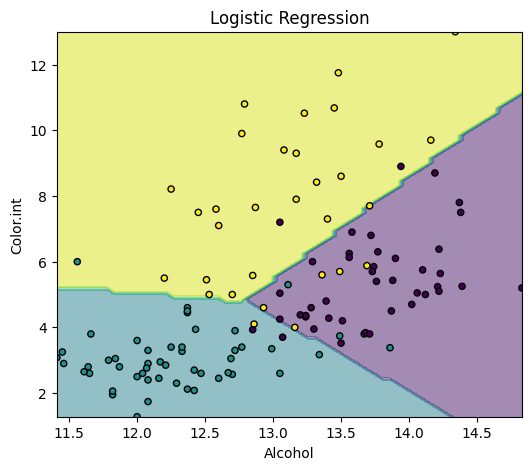

In [9]:
# Creamos una instancia de LogisticRegression. 
# Observar que en este caso seteamos el parametro multi_class='multinomial' para que 
# el modelo interprete que es un problema multiclase y que debe utilizarse para el 
# entrenamiento la funcion de costo conocida como Cross-Entropy.
lg = LogisticRegression(max_iter=200, 
                        multi_class='multinomial')

# Entrenamos el modelo solo con los features Alcohol y Color.int
lg.fit(X_train[["Alcohol", "Color.int"]], y_train)

# Graficamos
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

plot_model(X_train[["Alcohol", "Color.int"]], y_train, lg, ax1)
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Color.int")
_ = ax1.set_title("Logistic Regression")

### Ejercicio 5

Considerando en dataset de entrenamiento y de testeo creado anteriormente:
1. Escriba un programa en Python para obtener y entrenar un modelo de Regresión Logística con el dataset de entrenamiento completo (para todos los features). 
2. Obtener las predicciones para todo el dataset de testeo.
3. Evaluar el modelo con la métrica Accuracy.
**Ayuda:**
- Recordar los 4 pasos para entrenar un modelo: (1) Importar modulo, (2)Crear la instancia, (3) Entrenar el modelo y (4) Predecir para nuevos ejemplos.
- Setear multi_class='multinomial' para que el modelo de regresión logistica sea multiclase
- Para obtener la métrica de Accuracy se puede utilizar el método .accuracy_score(predictions, y_test)


In [10]:
# 1. Escriba un programa en Python para obtener y entrenar un modelo de Regresión Logística con el dataset de entrenamiento completo (para todos los features).
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(solver='lbfgs', max_iter=30000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=30000)

In [11]:
# 2. Obtener las predicciones para todo el dataset de testeo.
y_pred = modelo.predict(X_test)
print(y_pred[:10])
print(np.array(y_test[:10]))

[3 3 2 1 2 3 3 1 1 2]
[2 3 2 1 2 3 3 1 1 2]


In [12]:
# 3. Evaluar el modelo con la métrica Accuracy.

accuracy = modelo.score(X_test, y_test)
print(accuracy)

0.9444444444444444


# K-NN: Vecinos más cercanos

### Ejercicio 6
Considerando en dataset de entrenamiento y de testeo creado anteriormente:
1. Escriba un programa en Python para obtener y entrenar un modelo de K-NN con el dataset de entrenamiento completo (para todos los features). Utilice 5 como número de vecinos.
2. Obtener las predicciones para todo el dataset de testeo.
3. Evaluar el modelo con la métrica Accuracy.
 

In [13]:
# 1. Escriba un programa en Python para obtener y entrenar un modelo de K-NN con el dataset de entrenamiento completo (para todos los features). Utilice 5 como número de vecinos.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# 2. Obtener las predicciones para todo el dataset de testeo.
y_pred = knn.predict(X_test)
print(y_pred[:10])
print(np.array(y_test[:10]))

[2 1 2 3 2 2 2 1 1 3]
[2 3 2 1 2 3 3 1 1 2]


In [15]:
# 3. Evaluar el modelo con la métrica Accuracy.
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.6481481481481481


### Ejercicio 7
Entrene o ajuste los datos en el modelo y, utilizando el algoritmo K vecino más cercano, calcule el rendimiento para diferentes valores de k, tome como referencia valores de k entre 1 y 30.

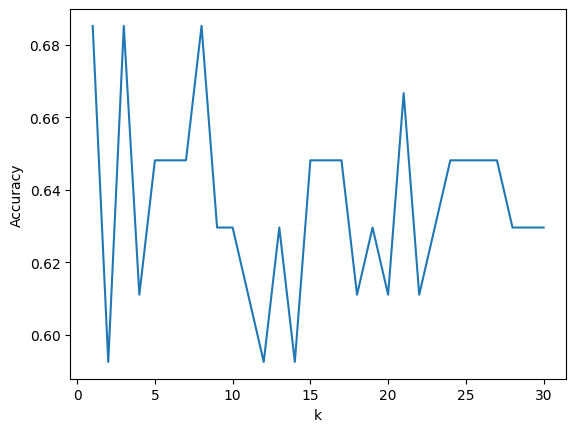

In [16]:
# Entrene o ajuste los datos en el modelo y, utilizando el algoritmo K vecino más cercano, calcule el rendimiento para diferentes valores de k, tome como referencia valores de k entre 1 y 30.
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()